Projekat 1

Importovanje biblioteka

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ucitavanje podataka

In [4]:
data = pd.read_csv("Occupancy_Estimation.csv")


Prikaz podataka

In [10]:
data.head(10)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Timestamp
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,1513939781
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,1513939812
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,1513939842
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,1513939873
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,1513939904
5,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1,1513939934
6,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1,1513939965
7,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1,1513939995
8,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1,1513940026
9,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1,1513940057


Tipovi podataka

In [6]:
data.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [7]:
#Spajanje Date i Time u jedan atribut
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.drop(['Date', 'Time'], axis=1, inplace=True)

#Pretvaranje DateTime u timestamp
data['Timestamp'] = data['DateTime'].astype('int64') // 10**9
data = data.drop(["DateTime"], axis=1)

data.dtypes

S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
Timestamp                 int64
dtype: object

Provera nedostajucih vrednosti

In [8]:
data.isna().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
Timestamp               0
dtype: int64

In [9]:
# Broj instanci u dataset-u 
len(data)

10129

In [12]:
# Brisanje duplikata
data.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10124    False
10125    False
10126    False
10127    False
10128    False
Length: 10129, dtype: bool

In [13]:
# Opis podataka
data.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Timestamp
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,1.012900e+04
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559,1.514406e+09
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633,6.229260e+05
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,1.513940e+09
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,1.514020e+09
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,1.514099e+09
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000,1.514264e+09
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000,1.515661e+09


Vrednosti za S3_Light i S5_CO2 imaju najveci opseg, pa je korisno ispitati njihovu distribuciju.

In [16]:
data.attrs

{}

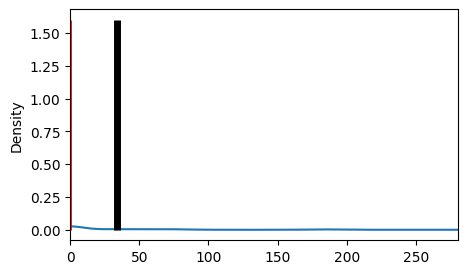

In [31]:
skewplot = data.S3_Light.plot(kind="density",
              figsize=(5,3),
              xlim=(data.S3_Light.min(),data.S3_Light.max()));
plt.vlines(data.S3_Light.mean(),
           ymin=0,
           ymax=1.6,
           linewidth=5.0,
           color="black");
plt.vlines(data.S3_Light.median(),
           ymin=0,
           ymax=1.6,
           linewidth=2.0,
           color="red");
plt.show()

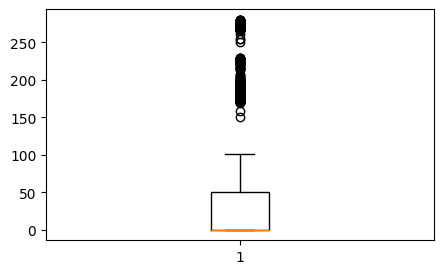

In [32]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(data.S3_Light)
plt.show()

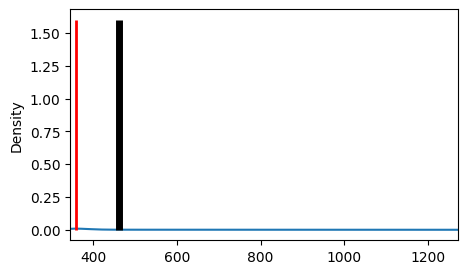

In [33]:
skewplot = data.S5_CO2.plot(kind="density",
              figsize=(5,3),
              xlim=(data.S5_CO2.min(),data.S5_CO2.max()));
plt.vlines(data.S5_CO2.mean(),
           ymin=0,
           ymax=1.6,
           linewidth=5.0,
           color="black");
plt.vlines(data.S5_CO2.median(),
           ymin=0,
           ymax=1.6,
           linewidth=2.0,
           color="red");
plt.show()

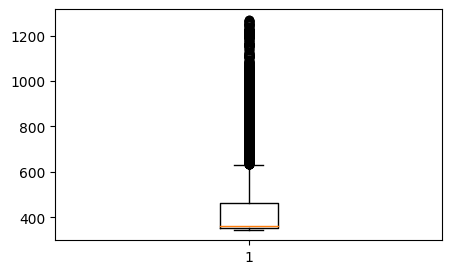

In [34]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(data.S5_CO2)
plt.show()

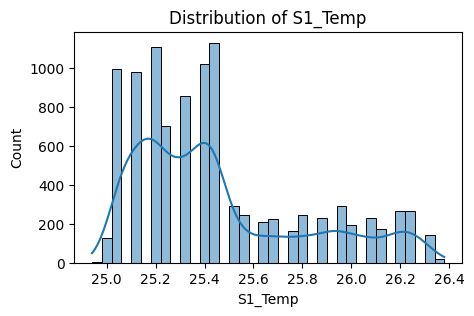

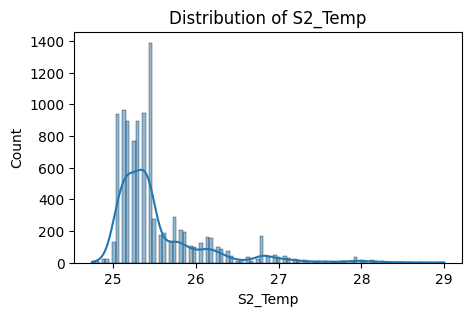

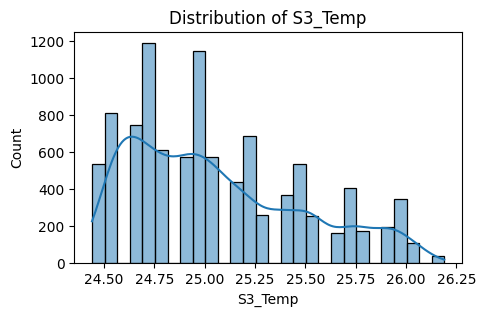

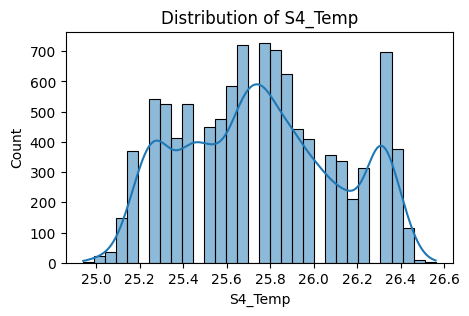

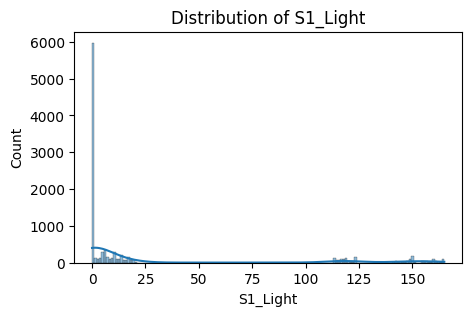

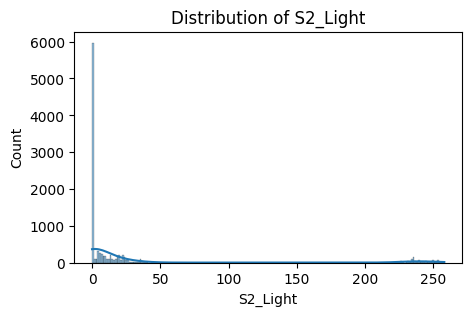

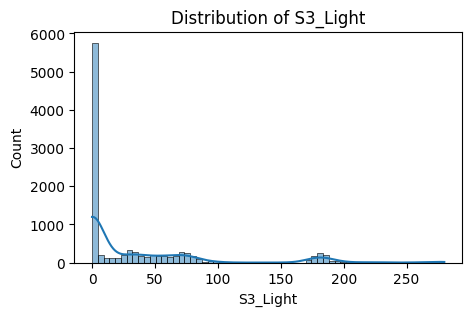

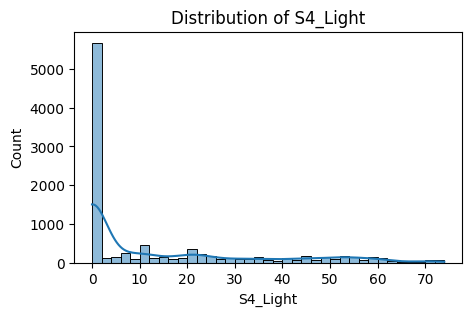

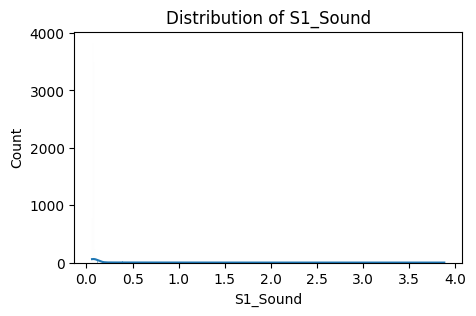

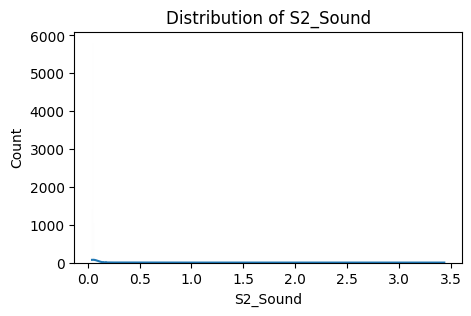

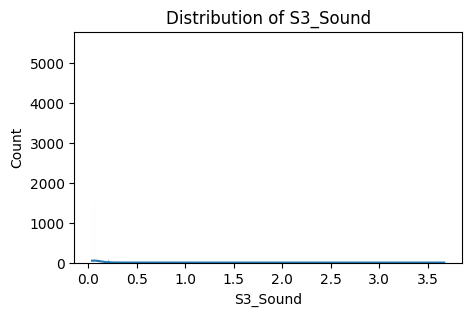

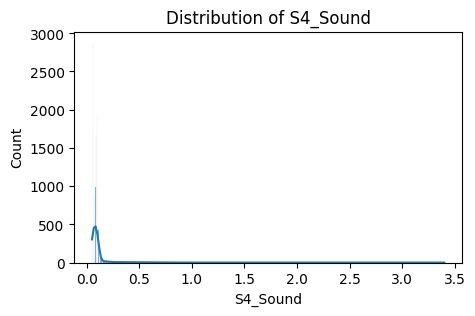

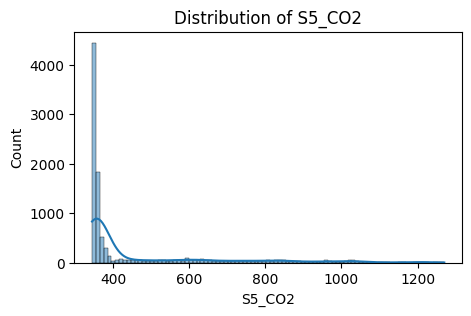

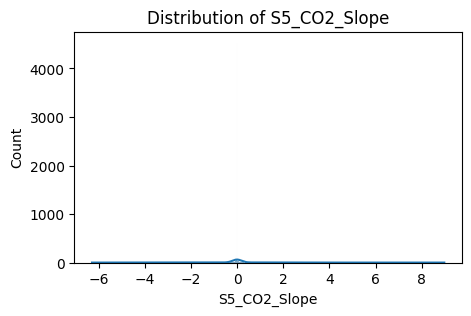

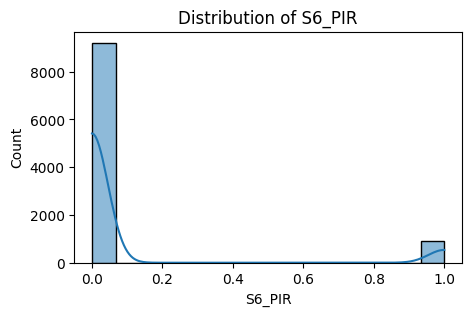

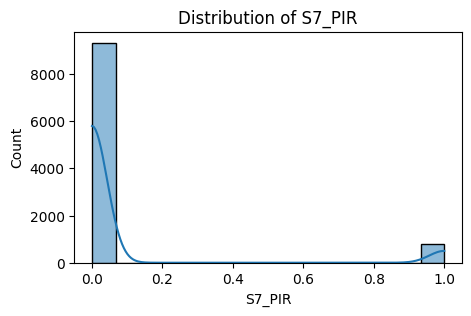

In [30]:
for column in data.columns[:-2]:
    plt.figure(figsize=(5, 3))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Korelacija izmedju varijabli

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'S1_Temp'),
  Text(1.5, 0, 'S2_Temp'),
  Text(2.5, 0, 'S3_Temp'),
  Text(3.5, 0, 'S4_Temp'),
  Text(4.5, 0, 'S1_Light'),
  Text(5.5, 0, 'S2_Light'),
  Text(6.5, 0, 'S3_Light'),
  Text(7.5, 0, 'S4_Light'),
  Text(8.5, 0, 'S1_Sound'),
  Text(9.5, 0, 'S2_Sound'),
  Text(10.5, 0, 'S3_Sound'),
  Text(11.5, 0, 'S4_Sound'),
  Text(12.5, 0, 'S5_CO2'),
  Text(13.5, 0, 'S5_CO2_Slope'),
  Text(14.5, 0, 'S6_PIR'),
  Text(15.5, 0, 'S7_PIR'),
  Text(16.5, 0, 'Room_Occupancy_Count'),
  Text(17.5, 0, 'Timestamp')])

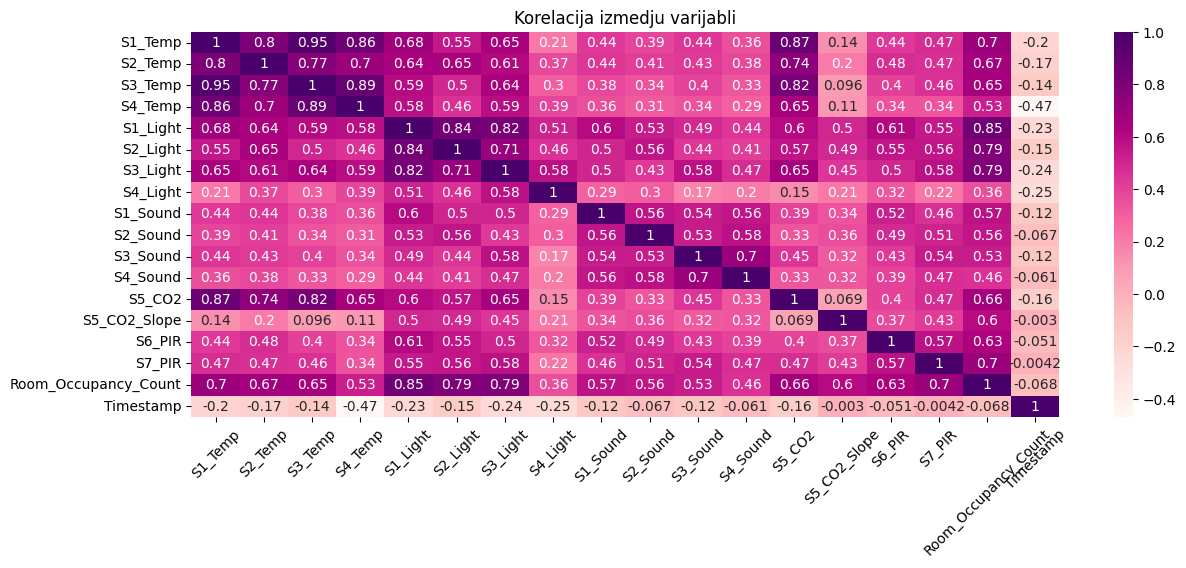

In [36]:
plt.subplots(figsize=(14,5))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Korelacija izmedju varijabli')
plt.xticks(rotation=45)

Mozemo primetiti da je veoma visoka korelacija izmedju S1_Temp i S3_Temp.
Uklonicemo S3_Temp.

In [37]:
data = data.drop(["S3_Temp"], axis=1)

In [38]:
data.columns

Index(['S1_Temp', 'S2_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2',
       'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count',
       'Timestamp'],
      dtype='object')

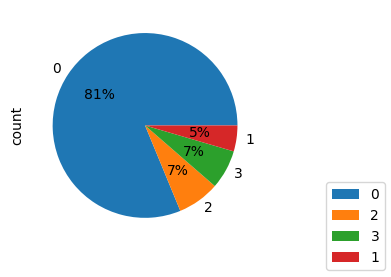

In [40]:
plt.figure(figsize=(5, 3))
pie = data.Room_Occupancy_Count.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(5, 3)
pie.figure.legend(loc='lower right')
plt.show()